##  Ashley Kong 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import confusion_matrix
import itertools

# Exercise

A. [Assemble dataframe](#section-1)<br>
B. [Plot the count of orders per week](#section-2)<br>
C. [Compute the mean order value for gender 0 and for gender 1](#section-3)<br>
D. [Generate confusion matrix](#section-4)<br>

*Please use Python*

The attached CSV file lists the customer, date, and dollar value of orders placed at a store in 2017. The actual gender and predicted gender of each customer is also provided.

Complete each of the following activities in a jupyter notebook using Python. Please do not exclude $0 orders.

# EDA

In [74]:
# Read in the csv file to get the exercise data
orders = pd.read_csv('screening_exercise_orders_v201810.csv')
orders.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [75]:
print("The total number of orders the store had in 2017 was:", len(orders))
print("The total number of unique customers the store had in 2017 was:", len(np.unique(orders['customer_id'])))

The total number of orders the store had in 2017 was: 13471
The total number of unique customers the store had in 2017 was: 8814


In [129]:
# Assuming 0 = male, 1 = female
print("The total number of instances of male customers the store had in 2017 was", len(orders[orders['gender'] == 0]))
print("The total number of instances of female customers the store had in 2017 was", len(orders[orders['gender'] == 1]))

The total number of instances of male customers the store had in 2017 was 6759
The total number of instances of female customers the store had in 2017 was 6712


In [77]:
orders[orders['customer_id'] == 1000]

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1


In [78]:
orders[orders['customer_id'] == 1005]

,customer_id,gender,date,value,predicted_gender
5,1005,1,2017-01-01 10:08:05,338.0,0
12953,1005,1,2017-12-16 01:39:27,120.6,0


Our data is a record of dollar value orders from both unique and reoccuring customers.

In [79]:
type(orders[orders['customer_id'] == 1005]['date'][5])

str

In [80]:
date1 = orders[orders['customer_id'] == 1005]['date'][5]
date2 = orders[orders['customer_id'] == 1005]['date'][12953]
dateobj1 = datetime.strptime(date1, '%Y-%m-%d %H:%M:%S')
dateobj2 = datetime.strptime(date2, '%Y-%m-%d %H:%M:%S')
max(dateobj1, dateobj2)

datetime.datetime(2017, 12, 16, 1, 39, 27)

In [81]:
dates = [datetime.strptime(dateString, '%Y-%m-%d %H:%M:%S') for dateString in orders['date'].tolist()]
orders['date'] = dates
type(orders['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [82]:
date1 = orders[orders['customer_id'] == 1005]['date']
max(date1)

Timestamp('2017-12-16 01:39:27')

In [83]:
orders.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


The "date" column in the "orders" dataframe contains string elements, I converted the strings to datetime timestamp objects to facilitate comparisons between different dates.

## (A) Assemble Dataframe <a id='section-1'> 
    
1. Assemble a dataframe with one row per customer and the following columns: 

    * \* customer_id * gender * most_recent_order_date * order_count (number of orders placed by this customer)

    * Sort the dataframe by customer_id ascending and display the first 10 rows.


In [84]:
# 'customer_id' acquired through obtaining the distinct customer id's that occur in the 'orders' dataframe
customerID = orders['customer_id'].unique()

# 'gender' acquired by selecting the 'gender' column after specifying distinct 'customer_id' in the 'orders' dataframe
gender = orders.drop_duplicates(['customer_id'])['gender'].tolist()

# 'most_recent_order_date' acquired by grouping by 'customer_id' and extracting the most recent date in the 'orders' dataframe
mostRecent = orders[['customer_id', 'date']].groupby("customer_id").max()['date'].tolist()

# 'order_count' acquired by grouping by 'customer_id' and extracting the aggregate count
orderCount = orders[['customer_id', 'value']].groupby("customer_id").count()['value'].tolist()

# Final dataframe with the labels: customer_id, gender, most_recent_order_date, order_count
customerOrders = pd.DataFrame({"customer_id": customerID,
                              "gender": gender,
                               "most_recent_order_date": mostRecent,
                              "order_count": orderCount})
customerOrders.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### Sanity Check 

In [85]:
orders[orders['customer_id'] == 1005]

,customer_id,gender,date,value,predicted_gender
5,1005,1,2017-01-01 10:08:05,338.0,0
12953,1005,1,2017-12-16 01:39:27,120.6,0


## (B) Plot the count of orders per week <a id='section-2'> 

1. Plot the count of orders per week for the store.

In [86]:
orders[orders['customer_id'] == 1005]['date'][12953]

Timestamp('2017-12-16 01:39:27')

In [87]:
orders[orders['customer_id'] == 1005]['date'][12953].strftime("%U")

'50'

In order to convert each datetime timestamp object to their corresponding week number, I used .strftime(), the parameter "%U" will consider the start of each week to be Sunday whereas "%W" would consider the start of each week to be Monday. 

NOTE: .strftime() will convert a datetime object to its string representation

In [88]:
weekNum = [day.strftime("%U") for day in orders['date']]
order_with_week = orders.copy()
order_with_week['week_num'] = weekNum
order_with_week.head()

,customer_id,gender,date,value,predicted_gender,week_num
0,1000,0,2017-01-01 00:11:31,198.5,1,01
1,1001,0,2017-01-01 00:29:56,338.0,1,01
2,1002,1,2017-01-01 01:30:31,733.0,1,01
3,1003,1,2017-01-01 01:34:22,772.0,1,01
4,1004,0,2017-01-01 03:11:54,508.0,1,01


In [89]:
order_count = order_with_week.groupby("week_num").count()
order_count.rename(columns = {"value": "count"}, inplace = True)
order_count['count'].head()

week_num
01    175
02    259
03    356
04    287
05    209
Name: count, dtype: int64

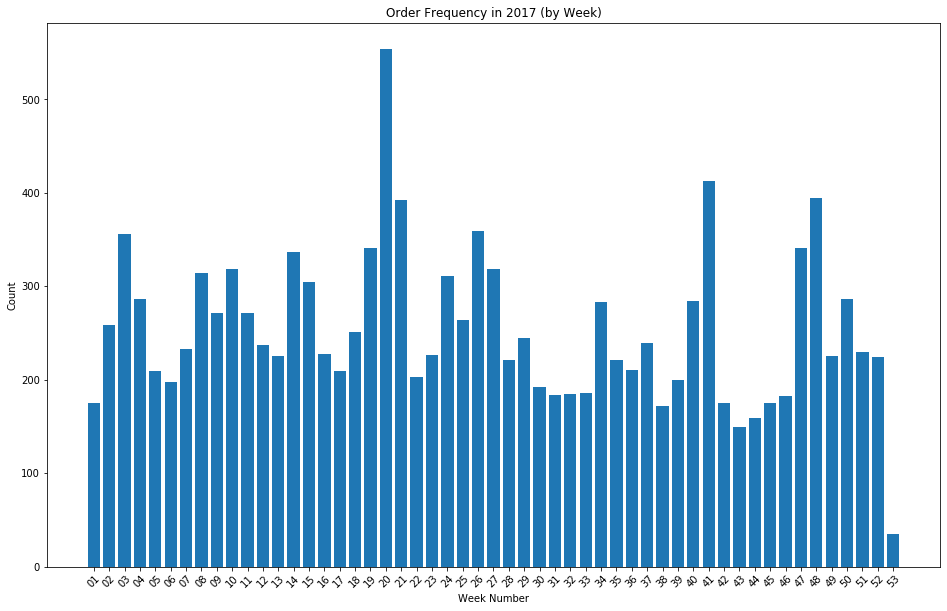

In [128]:
plt.figure(figsize=(16, 10))
plt.bar(order_count.index, order_count['count'])
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.title('Order Frequency in 2017 (by Week)')
plt.xticks(rotation=45);

In [91]:
print("The week with the highest number of orders was:", order_count['count'].idxmax())
print("The week with the lowest number of orders was:", order_count['count'].idxmin())

The week with the highest number of orders was: 20
The week with the lowest number of orders was: 53


## (C) Compute the mean order value for gender 0 and for gender 1 <a id='section-3'> 
  Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.  

Assumption: 
- For 'gender', 0 and 1 were interpreted as male and female respectively.

In [92]:
orders.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [93]:
gender_mean = orders.groupby("gender").mean().drop(columns = ["customer_id"])
gender_mean.rename(columns = {"value": "mean_order_value"}, inplace = True)
gender_mean

,mean_order_value,predicted_gender
gender,,
0,363.890006,0.504513
1,350.708361,0.782032


To answer whether or not the difference between the mean order value for female customers and that for male customers is significant, we can conduct a hypothesis test.

- Null Hypothesis: There is no difference between average order value made by female customers and the average order value made by male customers in 2017 and any apparent difference is attributed to chance.
- Alternative Hypothesis: On average, female customers spent less on store orders than male customers did in 2017.

Our test-statistic is the difference between the mean order values for female and male customers.


In [60]:
obs_test_stat = gender_mean['mean_order_value'][0] - gender_mean['mean_order_value'][1]
obs_test_stat

13.181644773815037

We can randomly shuffle the 'gender' column of the 'orders' dataframe and calculate the mean order value for the each new shuffled gender to calculate a sample test statistic of difference between their average order values. Then we can repeat this process 5,000 times to create a distribution to compare a p-value of 0.05 and determine which hypothesis is valid.

In [113]:
def simulate_diff():
    rand_gender = orders['gender'].tolist()
    np.random.shuffle(rand_gender)
    sample = orders.copy()
    sample['random gender'] = rand_gender
    rand_gender_mean = sample.groupby("random gender").mean().drop(columns = ["customer_id"])
    rand_gender_mean.rename(columns = {"value": "mean_order_value"}, inplace = True)
    diff = rand_gender_mean['mean_order_value'][0] - rand_gender_mean['mean_order_value'][1]
    return diff

simulate_diff()

-3.8022008978522877

In [118]:
list_of_differences = [simulate_diff() for i in range(5000)]
len(list_of_differences)

5000

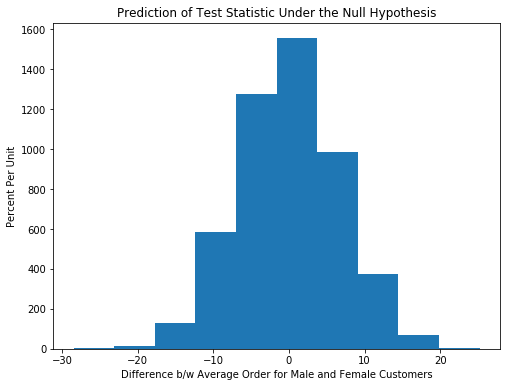

In [119]:
# Note that the histogram is centered around 0 b/c under the null hypothesis the 
# difference between the average order value for male and female customers should be the same
plt.figure(figsize=(8, 6))
plt.hist(list_of_differences)
plt.xlabel('Difference b/w Average Order for Male and Female Customers')
plt.ylabel('Percent Per Unit')
plt.title('Prediction of Test Statistic Under the Null Hypothesis');

In [127]:
p_value = sum([1 for i in list_of_differences if i > obs_test_stat])/5000
p_value

0.0232

Our p-value was 0.0232 <0.05, indicating that we reject the null hypothesis and the difference between the average order values for female and male customers are statistically significant. Of our 5,000 samples, 2.32% of them had a difference between average order for female and male customers greater than our original observed difference, 13.1816. The small p-value, 0.0232 indicates that the data favors the alternative hypothesis, we reject the null hypothesis and the difference in the average order value for female and male customers is significant.

## (D) Generate confusion matrix <a id='section-4'> 
 Generate a confusion matrix for the gender predictions of customers in this dataset. You should assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?   

Assumptions:

- For 'gender', 0 and 1 were interpreted as male and female respectively.

In [34]:
gender = orders.groupby("customer_id")
gender.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0
13467,9811,1,2017-12-31 22:24:06,148.60,0
13468,9812,0,2017-12-31 23:01:10,153.00,1
13469,9813,0,2017-12-31 23:11:02,534.00,1


In [37]:
gender_actual = [g[0] for g in gender['gender'].apply(np.unique).tolist()]
gender_predict = [g[0] for g in gender['predicted_gender'].apply(np.unique).tolist()]
#gender_predict

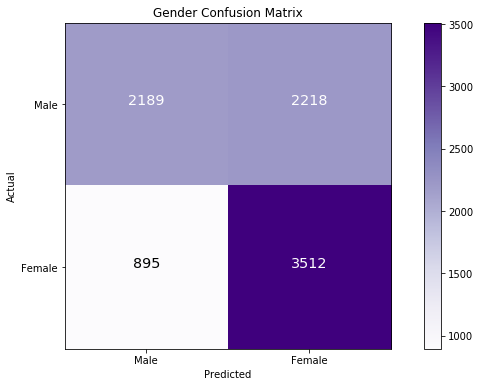

In [47]:
def plot(cm, classes,title='', cmap=plt.cm.Purples):   
    plt.figure(figsize=(12, 6))
    plt.imshow(cm, cmap=cmap)
    plt.colorbar()
    plt.title(title)
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)

    threshold = cm.max() / 2
    #print(threshold)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], size = 'x-large', horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")
        
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xlim(-0.5, 1.5)
    plt.ylim(1.5, -0.5)  
    
plot(confusion_matrix(gender_actual, gender_predict), classes = ['Male', 'Female'], title = 'Gender Confusion Matrix')

In [43]:
true_neg, false_pos, false_neg, true_pos = confusion_matrix(gender_actual, gender_predict).ravel()

print("Number of True Positives:", true_pos)
print("Number of False Positives:", false_pos)
print("Number of True Negatives:", true_neg)
print("Number of False Negatives:", false_neg)

Number of True Positives: 3512
Number of False Positives: 2218
Number of True Negatives: 2189
Number of False Negatives: 895


In [53]:
# Recall
print("The recall of the model was", (true_pos/(true_pos + false_neg)))

# Precision:
print("The precision of the model was", true_pos/(true_pos + false_pos))

# Specificity
print("The specificity of the model was", true_neg/(true_neg + false_pos))

# Accuracy
print("The accuracy of the model was ", (true_pos + true_neg) / (true_pos + false_pos + true_neg + false_neg))

The recall of the model was 0.7969140004538234
The precision of the model was 0.612914485165794
The specificity of the model was 0.4967097798956206
The accuracy of the model was  0.6468118901747221


Out of all the female customers that ordered from the store in 2017, the model correctly classified 79.69% of them. Out of all the female customer predictions that the model made, 61.29% of them were correct. Out of all the male cusomer predictions that the model made, 49.67% of them were correct. Overall, the model accurately classified 64.68% of the customers that placed orders from the store in 2017. 

Although the model had a 64.68% accuracy when predicting the gender of a customer that placed an order in 2017, we know from above EDA that we have slightly more male customers than female customers, yet the model was over 10% worse at predicting male customers than it was at predicting female customers and with a 49.67% specificity, was no better than randomly guessing for predicting the male gender. Because we do not know the data that the model was trained on it could potentially be attributed to the training data having a higher representation of female customers, etc.